In [1]:
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Grouper
from pandas import DataFrame
import csv
import pickle
import math
import matrixprofile as mp
from matplotlib.patches import Rectangle
from fbprophet import Prophet
from prophet.plot import plot_yearly
from sklearn.metrics import mean_squared_error
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from sklearn.model_selection import TimeSeriesSplit
from numpy import sqrt
import datetime
from datetime import timedelta
import plotly.graph_objs as go

/home/jonathan/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def df_origen(origen,destino):    
    
    ######################PICKLE 1###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento1.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df1 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df1.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)            
    
    df1_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)   
    
    ######################PICKLE 2###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento2.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df2 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df2.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)           
    
    df2_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)   
    
    ######################PICKLE 3###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento3.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df3 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df3.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)            
    
    df3_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)
    
    
    
    df1_Final['Fecha'] = df1_Final.index.date
    df1_Final['Año'] = df1_Final.index.year                                
    df1_Final['Mes'] = df1_Final.index.month                               
    df1_Final['ID_Dia'] = df1_Final.index.dayofweek
    df1_Final['Hora'] = df1_Final.index.hour
    df1_Final['WeekNo'] = df1_Final.index.isocalendar().week
    
    df2_Final['Fecha'] = df2_Final.index.date
    df2_Final['Año'] = df2_Final.index.year                                
    df2_Final['Mes'] = df2_Final.index.month                               
    df2_Final['ID_Dia'] = df2_Final.index.dayofweek
    df2_Final['Hora'] = df2_Final.index.hour
    df2_Final['WeekNo'] = df2_Final.index.isocalendar().week
    
    df3_Final['Fecha'] = df3_Final.index.date
    df3_Final['Año'] = df3_Final.index.year                                
    df3_Final['Mes'] = df3_Final.index.month                               
    df3_Final['ID_Dia'] = df3_Final.index.dayofweek
    df3_Final['Hora'] = df3_Final.index.hour
    df3_Final['WeekNo'] = df3_Final.index.isocalendar().week
    
    return df1, lista, df2, df3, df1_Final,df2_Final,df3_Final, listaDst

In [3]:
origen = "2807905"
destino = "2807901"
df1, lista, df2, df3, df1_Final,df2_Final,df3_Final, listaDst = df_origen(origen,destino)
df1_Final.head(5)
df2_Final.head(5)
df3_Final.head(5)

,2807905-2807901,Fecha,Año,Mes,ID_Dia,Hora,WeekNo
ds,,,,,,,
2020-08-01 00:00:00,342.675,2020-08-01,2020,8,5,0,31
2020-08-01 01:00:00,161.815,2020-08-01,2020,8,5,1,31
2020-08-01 02:00:00,69.203,2020-08-01,2020,8,5,2,31
2020-08-01 03:00:00,44.679,2020-08-01,2020,8,5,3,31
2020-08-01 04:00:00,27.632,2020-08-01,2020,8,5,4,31


In [4]:
#Creamos intervalos de datos por periodos
data1=df1_Final.loc['2020-03-16':'2020-04-15']
data2=df1_Final.loc['2020-04-16':'2020-05-15']
data3=df1_Final.loc['2020-05-02':'2020-05-31']
data4=df2_Final.loc['2020-06-01':'2020-06-30']
data5=df2_Final.loc['2020-07-01':'2020-07-31']
data6=df3_Final.loc['2020-08-01':'2020-08-31']
data3.head(5)

,2807905-2807901,Fecha,Año,Mes,ID_Dia,Hora,WeekNo
ds,,,,,,,
2020-05-02 00:00:00,6.944,2020-05-02,2020,5,5,0,18
2020-05-02 01:00:00,17.860,2020-05-02,2020,5,5,1,18
2020-05-02 02:00:00,11.972,2020-05-02,2020,5,5,2,18
2020-05-02 03:00:00,12.205,2020-05-02,2020,5,5,3,18
2020-05-02 04:00:00,5.986,2020-05-02,2020,5,5,4,18


# Periodo 1 - Desescalada y Nueva Normalidad (2 mayo 2020-31 Agosto 2020)

In [5]:
Periodo1 = pd.concat([data3,data4,data5,data6])
Periodo1 = Periodo1.drop(columns=['Fecha','Año','Mes','ID_Dia','Hora','WeekNo'])
Periodo1 = Periodo1.reset_index()
Periodo1 = Periodo1.rename(columns={'2807905-2807901':'y'})
Periodo1.tail()

,ds,y
2923,2020-08-31 19:00:00,509.100
2924,2020-08-31 20:00:00,293.615
2925,2020-08-31 21:00:00,256.641
2926,2020-08-31 22:00:00,172.866
2927,2020-08-31 23:00:00,140.111


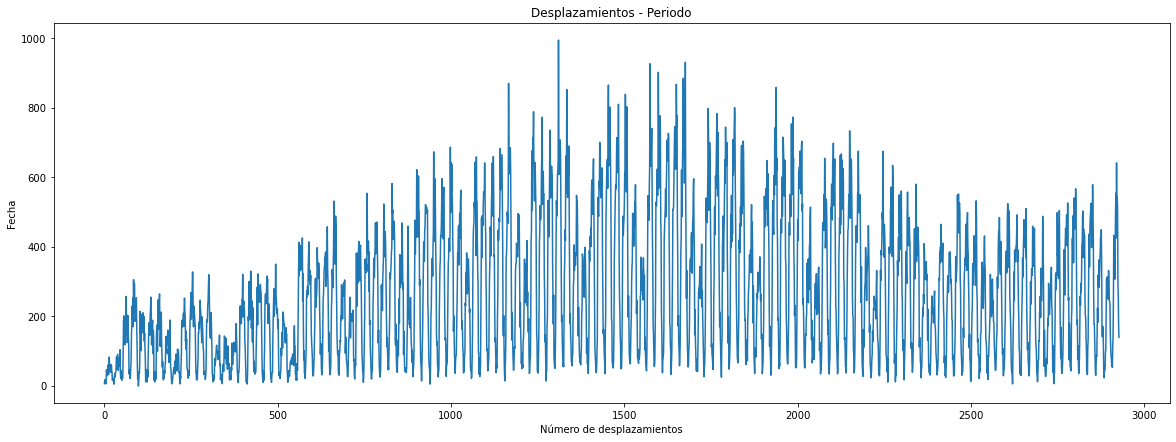

In [6]:
Periodo1['y'].plot(figsize=(20,7), legend=None, title='Desplazamientos - Periodo')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()

# Dividimos el periodo 1 en 2 subconjuntos - Desescalada y Nueva normalidad
## Desescalada: 2 Mayo - 8 Junio

In [7]:
start_date = pd.Timestamp('2020-05-02')
end_date = pd.Timestamp('2020-06-08 23:00:00')
mask = (Periodo1['ds'] >= start_date) & (Periodo1['ds'] <= end_date)
PeriodoDesescalada = Periodo1.loc[mask]

## Nueva normalidad: 9 Junio - 31 Agosto

In [8]:
start_date = pd.Timestamp('2020-06-09')
end_date = pd.Timestamp('2020-08-31 23:00:00')
mask = (Periodo1['ds'] >= start_date) & (Periodo1['ds'] <= end_date)
PeriodoNnormalidad = Periodo1.loc[mask]

In [9]:
def est_Lunes(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0)

def est_Lunes1AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 1)

def est_Lunes2AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 2)

def est_Lunes3AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 3)

def est_Lunes4AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 4)

def est_Lunes5AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 5)

def est_Lunes6AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 6)

def est_Lunes7AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 7)

def est_Lunes8AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 8)

def est_Lunes9AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 9)

def est_Lunes10AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 10)

def est_Lunes11AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 11)

def est_Lunes12PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 12)

def est_Lunes13PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 13)

def est_Lunes14PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 14)

def est_Lunes15PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 15)

def est_Lunes16PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 16)

def est_Lunes17PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 17)

def est_Lunes18PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 18)

def est_Lunes19PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 19)

def est_Lunes20PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 20)

def est_Lunes21PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 21)

def est_Lunes22PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 22)

def est_Lunes23PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 23)

def est_Lunes24AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 0)


##############################################Train########################################################

def Regressor1AMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 1:                 
        mean = Train1AM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor2AMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 2:                 
        mean = Train2AM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor3AMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 3:                 
        mean = Train3AM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor4AMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 4:                 
        mean = Train4AM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor5AMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 5:                 
        mean = Train5AM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor6AMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 6:                 
        mean = Train6AM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor7AMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 7:                 
        mean = Train7AM_N.y.mean()
        valor = mean         
    else:
        valor = 0    
    return (valor)

def Regressor8AMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 8:                 
        mean = Train8AM_N.y.mean()
        valor = mean                
    else:
        valor = 0    
    return (valor)

def Regressor9AMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 9:                 
        mean = Train9AM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor10AMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 10:                 
        mean = Train10AM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor11AMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 11:                 
        mean = Train11AM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor12PMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 12:                 
        mean = Train12PM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor13PMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 13:                 
        mean = Train13PM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor14PMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 14:                 
        mean = Train14PM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor15PMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 15:                 
        mean = Train15PM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor16PMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 16:                 
        mean = Train16PM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor17PMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 17:                 
        mean = Train17PM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor18PMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 18:                 
        mean = Train18PM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor19PMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 19:                 
        mean = Train19PM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor20PMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 20:                 
        mean = Train20PM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor21PMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 21:                 
        mean = Train21PM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor22PMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 22:                 
        mean = Train22PM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor23PMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 23:                 
        mean = Train23PM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor24AMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 0:                 
        mean = Train24AM_N.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)


PeriodoDesescalada['Lunes1AM'] = PeriodoDesescalada['ds'].apply(est_Lunes1AM)
PeriodoNnormalidad['Lunes1AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes1AM)

PeriodoDesescalada['Lunes'] = PeriodoDesescalada['ds'].apply(est_Lunes)
PeriodoNnormalidad['Lunes'] = PeriodoNnormalidad['ds'].apply(est_Lunes)
 

PeriodoDesescalada['Lunes2AM'] = PeriodoDesescalada['ds'].apply(est_Lunes2AM)
PeriodoNnormalidad['Lunes2AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes2AM)

PeriodoDesescalada['Lunes3AM'] = PeriodoDesescalada['ds'].apply(est_Lunes3AM)
PeriodoNnormalidad['Lunes3AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes3AM)

PeriodoDesescalada['Lunes4AM'] = PeriodoDesescalada['ds'].apply(est_Lunes4AM)
PeriodoNnormalidad['Lunes4AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes4AM)

PeriodoDesescalada['Lunes5AM'] = PeriodoDesescalada['ds'].apply(est_Lunes5AM)
PeriodoNnormalidad['Lunes5AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes5AM)

PeriodoDesescalada['Lunes6AM'] = PeriodoDesescalada['ds'].apply(est_Lunes6AM)
PeriodoNnormalidad['Lunes6AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes6AM)

PeriodoDesescalada['Lunes7AM'] = PeriodoDesescalada['ds'].apply(est_Lunes7AM)
PeriodoNnormalidad['Lunes7AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes7AM)

PeriodoDesescalada['Lunes8AM'] = PeriodoDesescalada['ds'].apply(est_Lunes8AM)
PeriodoNnormalidad['Lunes8AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes8AM)

PeriodoDesescalada['Lunes9AM'] = PeriodoDesescalada['ds'].apply(est_Lunes9AM)
PeriodoNnormalidad['Lunes9AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes9AM)

PeriodoDesescalada['Lunes10AM'] = PeriodoDesescalada['ds'].apply(est_Lunes10AM)
PeriodoNnormalidad['Lunes10AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes10AM)

PeriodoDesescalada['Lunes11AM'] = PeriodoDesescalada['ds'].apply(est_Lunes11AM)
PeriodoNnormalidad['Lunes11AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes11AM)

PeriodoDesescalada['Lunes12PM'] = PeriodoDesescalada['ds'].apply(est_Lunes12PM)
PeriodoNnormalidad['Lunes12PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes12PM)

PeriodoDesescalada['Lunes13PM'] = PeriodoDesescalada['ds'].apply(est_Lunes13PM)
PeriodoNnormalidad['Lunes13PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes13PM)

PeriodoDesescalada['Lunes14PM'] = PeriodoDesescalada['ds'].apply(est_Lunes14PM)
PeriodoNnormalidad['Lunes14PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes14PM)

PeriodoDesescalada['Lunes15PM'] = PeriodoDesescalada['ds'].apply(est_Lunes15PM)
PeriodoNnormalidad['Lunes15PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes15PM)

PeriodoDesescalada['Lunes16PM'] = PeriodoDesescalada['ds'].apply(est_Lunes16PM)
PeriodoNnormalidad['Lunes16PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes16PM)

PeriodoDesescalada['Lunes17PM'] = PeriodoDesescalada['ds'].apply(est_Lunes17PM)
PeriodoNnormalidad['Lunes17PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes17PM)

PeriodoDesescalada['Lunes18PM'] = PeriodoDesescalada['ds'].apply(est_Lunes18PM)
PeriodoNnormalidad['Lunes18PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes18PM)

PeriodoDesescalada['Lunes19PM'] = PeriodoDesescalada['ds'].apply(est_Lunes19PM)
PeriodoNnormalidad['Lunes19PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes19PM)

PeriodoDesescalada['Lunes20PM'] = PeriodoDesescalada['ds'].apply(est_Lunes20PM)
PeriodoNnormalidad['Lunes20PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes20PM)

PeriodoDesescalada['Lunes21PM'] = PeriodoDesescalada['ds'].apply(est_Lunes21PM)
PeriodoNnormalidad['Lunes21PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes21PM)

PeriodoDesescalada['Lunes22PM'] = PeriodoDesescalada['ds'].apply(est_Lunes22PM)
PeriodoNnormalidad['Lunes22PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes22PM)

PeriodoDesescalada['Lunes23PM'] = PeriodoDesescalada['ds'].apply(est_Lunes23PM)
PeriodoNnormalidad['Lunes23PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes23PM)

PeriodoDesescalada['Lunes24AM'] = PeriodoDesescalada['ds'].apply(est_Lunes24AM)
PeriodoNnormalidad['Lunes24AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes24AM)


/tmp/ipykernel_7084/796821550.py:345: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PeriodoDesescalada['Lunes1AM'] = PeriodoDesescalada['ds'].apply(est_Lunes1AM)
/tmp/ipykernel_7084/796821550.py:346: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PeriodoNnormalidad['Lunes1AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes1AM)
/tmp/ipykernel_7084/796821550.py:348: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

/tmp/ipykernel_7084/796821550.py:404: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PeriodoNnormalidad['Lunes19PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes19PM)
/tmp/ipykernel_7084/796821550.py:406: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PeriodoDesescalada['Lunes20PM'] = PeriodoDesescalada['ds'].apply(est_Lunes20PM)
/tmp/ipykernel_7084/796821550.py:407: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

# IMPLEMENTACIÓN DE MODELO PROPHET
## Separamos el conjunto de datos de entrenamiento y prueba

In [10]:
PeriodoDesescalada = PeriodoDesescalada.set_index('ds')
PeriodoNnormalidad = PeriodoNnormalidad.set_index('ds')

In [11]:
#Desescalada
train_end_D = datetime.datetime(2020,6,7,23,0,0)
test_end_D = datetime.datetime(2020,6,8,23,0,0)

train_data_D = PeriodoDesescalada[:train_end_D]
test_data_D = PeriodoDesescalada[train_end_D + timedelta(hours=1):test_end_D]

#Nueva Normalidad
train_end_N = datetime.datetime(2020,8,30,23,0,0)
test_end_N = datetime.datetime(2020,8,31,23,0,0)

train_data_N = PeriodoNnormalidad[:train_end_N]
test_data_N = PeriodoNnormalidad[train_end_N + timedelta(hours=1):test_end_N]

In [12]:
train_data_D = train_data_D.reset_index()
train_data_N = train_data_N.reset_index()

test_data_D = test_data_D.reset_index()
test_data_N = test_data_N.reset_index()

# Ajustamos el periodo de Fourier-Horas con el periodo de datos entrenamiento


In [13]:
##################PeriodoNnormalidad######################
mask1AM_N = (PeriodoNnormalidad['Lunes1AM'] == True)
mask2AM_N = (PeriodoNnormalidad['Lunes2AM'] == True)
mask3AM_N = (PeriodoNnormalidad['Lunes3AM'] == True)
mask4AM_N = (PeriodoNnormalidad['Lunes4AM'] == True)
mask5AM_N = (PeriodoNnormalidad['Lunes5AM'] == True)
mask6AM_N = (PeriodoNnormalidad['Lunes6AM'] == True)
mask7AM_N = (PeriodoNnormalidad['Lunes7AM'] == True)
mask8AM_N = (PeriodoNnormalidad['Lunes8AM'] == True)
mask9AM_N = (PeriodoNnormalidad['Lunes9AM'] == True)
mask10AM_N = (PeriodoNnormalidad['Lunes10AM'] == True)
mask11AM_N = (PeriodoNnormalidad['Lunes11AM'] == True)
mask12PM_N = (PeriodoNnormalidad['Lunes12PM'] == True)
mask13PM_N = (PeriodoNnormalidad['Lunes13PM'] == True)
mask14PM_N = (PeriodoNnormalidad['Lunes14PM'] == True)
mask15PM_N = (PeriodoNnormalidad['Lunes15PM'] == True)
mask16PM_N = (PeriodoNnormalidad['Lunes16PM'] == True)
mask17PM_N = (PeriodoNnormalidad['Lunes17PM'] == True)
mask18PM_N = (PeriodoNnormalidad['Lunes18PM'] == True)
mask19PM_N = (PeriodoNnormalidad['Lunes19PM'] == True)
mask20PM_N = (PeriodoNnormalidad['Lunes20PM'] == True)
mask21PM_N = (PeriodoNnormalidad['Lunes21PM'] == True)
mask22PM_N = (PeriodoNnormalidad['Lunes22PM'] == True)
mask23PM_N = (PeriodoNnormalidad['Lunes23PM'] == True)
mask24AM_N = (PeriodoNnormalidad['Lunes24AM'] == True)

Train1AM_N = PeriodoNnormalidad.loc[mask1AM_N]
Train2AM_N = PeriodoNnormalidad.loc[mask2AM_N]
Train3AM_N = PeriodoNnormalidad.loc[mask3AM_N]
Train4AM_N = PeriodoNnormalidad.loc[mask4AM_N]
Train5AM_N = PeriodoNnormalidad.loc[mask5AM_N]
Train6AM_N = PeriodoNnormalidad.loc[mask6AM_N]
Train7AM_N = PeriodoNnormalidad.loc[mask7AM_N]
Train8AM_N = PeriodoNnormalidad.loc[mask8AM_N]
Train9AM_N = PeriodoNnormalidad.loc[mask9AM_N]
Train10AM_N = PeriodoNnormalidad.loc[mask10AM_N]
Train11AM_N = PeriodoNnormalidad.loc[mask11AM_N]
Train12PM_N = PeriodoNnormalidad.loc[mask12PM_N]
Train13PM_N = PeriodoNnormalidad.loc[mask13PM_N]
Train14PM_N = PeriodoNnormalidad.loc[mask14PM_N]
Train15PM_N = PeriodoNnormalidad.loc[mask15PM_N]
Train16PM_N = PeriodoNnormalidad.loc[mask16PM_N]
Train17PM_N = PeriodoNnormalidad.loc[mask17PM_N]
Train18PM_N = PeriodoNnormalidad.loc[mask18PM_N]
Train19PM_N = PeriodoNnormalidad.loc[mask19PM_N]
Train20PM_N = PeriodoNnormalidad.loc[mask20PM_N]
Train21PM_N = PeriodoNnormalidad.loc[mask21PM_N]
Train22PM_N = PeriodoNnormalidad.loc[mask22PM_N]
Train23PM_N = PeriodoNnormalidad.loc[mask23PM_N]
Train24AM_N = PeriodoNnormalidad.loc[mask24AM_N]

# Obtenemos el promedio por horas para obtener un patrón por hora los Lunes
### Hay que sacar un promedio del periodo Desescalada, un promedio por hora y replicar ese promedio en el futuro, el patrón promedio tendrá un periodo. 

In [14]:
Train8AM_N

,y,Lunes1AM,Lunes,Lunes2AM,Lunes3AM,Lunes4AM,Lunes5AM,Lunes6AM,Lunes7AM,Lunes8AM,...,Lunes15PM,Lunes16PM,Lunes17PM,Lunes18PM,Lunes19PM,Lunes20PM,Lunes21PM,Lunes22PM,Lunes23PM,Lunes24AM
ds,,,,,,,,,,,,,,,,,,,,,
2020-06-15 08:00:00,428.921,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2020-06-22 08:00:00,444.104,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2020-06-29 08:00:00,358.120,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2020-07-06 08:00:00,546.977,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2020-07-13 08:00:00,540.556,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2020-07-20 08:00:00,545.494,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2020-07-27 08:00:00,456.258,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2020-08-03 08:00:00,303.861,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2020-08-10 08:00:00,310.196,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [15]:
Train8AM_N = Train8AM_N.reset_index()
start8AM_N = Train8AM_N.iloc[0]['ds']
end8AM_N = Train8AM_N.iloc[-1]['ds'] 
N_Dias = pd.date_range(start8AM_N, end8AM_N, freq='D')
print(len(N_Dias))
print(N_Dias)

78
DatetimeIndex(['2020-06-15 08:00:00', '2020-06-16 08:00:00',
               '2020-06-17 08:00:00', '2020-06-18 08:00:00',
               '2020-06-19 08:00:00', '2020-06-20 08:00:00',
               '2020-06-21 08:00:00', '2020-06-22 08:00:00',
               '2020-06-23 08:00:00', '2020-06-24 08:00:00',
               '2020-06-25 08:00:00', '2020-06-26 08:00:00',
               '2020-06-27 08:00:00', '2020-06-28 08:00:00',
               '2020-06-29 08:00:00', '2020-06-30 08:00:00',
               '2020-07-01 08:00:00', '2020-07-02 08:00:00',
               '2020-07-03 08:00:00', '2020-07-04 08:00:00',
               '2020-07-05 08:00:00', '2020-07-06 08:00:00',
               '2020-07-07 08:00:00', '2020-07-08 08:00:00',
               '2020-07-09 08:00:00', '2020-07-10 08:00:00',
               '2020-07-11 08:00:00', '2020-07-12 08:00:00',
               '2020-07-13 08:00:00', '2020-07-14 08:00:00',
               '2020-07-15 08:00:00', '2020-07-16 08:00:00',
               '2020-

In [16]:
#Entrenamiento

train_data_N['Patron1AM_N'] = train_data_N['ds'].apply(Regressor1AMTrain)
train_data_N['Patron2AM_N'] = train_data_N['ds'].apply(Regressor2AMTrain)
train_data_N['Patron3AM_N'] = train_data_N['ds'].apply(Regressor3AMTrain)
train_data_N['Patron4AM_N'] = train_data_N['ds'].apply(Regressor4AMTrain)
train_data_N['Patron5AM_N'] = train_data_N['ds'].apply(Regressor5AMTrain)
train_data_N['Patron6AM_N'] = train_data_N['ds'].apply(Regressor6AMTrain)
train_data_N['Patron7AM_N'] = train_data_N['ds'].apply(Regressor7AMTrain)
train_data_N['Patron8AM_N'] = train_data_N['ds'].apply(Regressor8AMTrain)
train_data_N['Patron9AM_N'] = train_data_N['ds'].apply(Regressor9AMTrain)
train_data_N['Patron10AM_N'] = train_data_N['ds'].apply(Regressor10AMTrain)
train_data_N['Patron11AM_N'] = train_data_N['ds'].apply(Regressor11AMTrain)
train_data_N['Patron12PM_N'] = train_data_N['ds'].apply(Regressor12PMTrain)
train_data_N['Patron13PM_N'] = train_data_N['ds'].apply(Regressor13PMTrain)
train_data_N['Patron14PM_N'] = train_data_N['ds'].apply(Regressor14PMTrain)
train_data_N['Patron15PM_N'] = train_data_N['ds'].apply(Regressor15PMTrain)
train_data_N['Patron16PM_N'] = train_data_N['ds'].apply(Regressor16PMTrain)
train_data_N['Patron17PM_N'] = train_data_N['ds'].apply(Regressor17PMTrain)
train_data_N['Patron18PM_N'] = train_data_N['ds'].apply(Regressor18PMTrain)
train_data_N['Patron19PM_N'] = train_data_N['ds'].apply(Regressor19PMTrain)
train_data_N['Patron20PM_N'] = train_data_N['ds'].apply(Regressor20PMTrain)
train_data_N['Patron21PM_N'] = train_data_N['ds'].apply(Regressor21PMTrain)
train_data_N['Patron22PM_N'] = train_data_N['ds'].apply(Regressor22PMTrain)
train_data_N['Patron23PM_N'] = train_data_N['ds'].apply(Regressor23PMTrain)
train_data_N['Patron24AM_N'] = train_data_N['ds'].apply(Regressor24AMTrain)

#####################################Test#####################################
test_data_N['Patron1AM_N'] = test_data_N['ds'].apply(Regressor1AMTrain)
test_data_N['Patron2AM_N'] = test_data_N['ds'].apply(Regressor2AMTrain)
test_data_N['Patron3AM_N'] = test_data_N['ds'].apply(Regressor3AMTrain)
test_data_N['Patron4AM_N'] = test_data_N['ds'].apply(Regressor4AMTrain)
test_data_N['Patron5AM_N'] = test_data_N['ds'].apply(Regressor5AMTrain)
test_data_N['Patron6AM_N'] = test_data_N['ds'].apply(Regressor6AMTrain)
test_data_N['Patron7AM_N'] = test_data_N['ds'].apply(Regressor7AMTrain)
test_data_N['Patron8AM_N'] = test_data_N['ds'].apply(Regressor8AMTrain)
test_data_N['Patron9AM_N'] = test_data_N['ds'].apply(Regressor9AMTrain)
test_data_N['Patron10AM_N'] = test_data_N['ds'].apply(Regressor10AMTrain)
test_data_N['Patron11AM_N'] = test_data_N['ds'].apply(Regressor11AMTrain)
test_data_N['Patron12PM_N'] = test_data_N['ds'].apply(Regressor12PMTrain)
test_data_N['Patron13PM_N'] = test_data_N['ds'].apply(Regressor13PMTrain)
test_data_N['Patron14PM_N'] = test_data_N['ds'].apply(Regressor14PMTrain)
test_data_N['Patron15PM_N'] = test_data_N['ds'].apply(Regressor15PMTrain)
test_data_N['Patron16PM_N'] = test_data_N['ds'].apply(Regressor16PMTrain)
test_data_N['Patron17PM_N'] = test_data_N['ds'].apply(Regressor17PMTrain)
test_data_N['Patron18PM_N'] = test_data_N['ds'].apply(Regressor18PMTrain)
test_data_N['Patron19PM_N'] = test_data_N['ds'].apply(Regressor19PMTrain)
test_data_N['Patron20PM_N'] = test_data_N['ds'].apply(Regressor20PMTrain)
test_data_N['Patron21PM_N'] = test_data_N['ds'].apply(Regressor21PMTrain)
test_data_N['Patron22PM_N'] = test_data_N['ds'].apply(Regressor22PMTrain)
test_data_N['Patron23PM_N'] = test_data_N['ds'].apply(Regressor23PMTrain)
test_data_N['Patron24AM_N'] = test_data_N['ds'].apply(Regressor24AMTrain)

In [17]:
#train_data_D.iloc[56:59]
#test_data_D.head(50)
#test_data_D.ds.iloc[0]
#Train8AM_D

# Nueva Normalidad
## Aplicamos Rolling Forecasting para evaluación del modelo
## Agregamos Regressor

In [20]:
fila = 0
fila2 = 0
def rolling_forecast():       
    predictions_rolling = pd.DataFrame({})
    history = train_data_N.copy()   # El problema es en history       
    
    for t in range(len(test_data_N)):        
        global fila 
        global fila2
        m = Prophet(seasonality_mode='multiplicative',)          
        m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
        m.add_seasonality(name='Lunes_season', period=1, fourier_order=5, condition_name='Lunes')
#         m.add_seasonality(name='Lunes8AM_season', period=29, fourier_order=5, condition_name='Lunes8AM')
#         m.add_seasonality(name='Lunes14PM_season', period=29, fourier_order=5, condition_name='Lunes14PM')        
#         m.add_seasonality(name='Lunes16PM_season', period=29, fourier_order=5, condition_name='Lunes16PM')       
        
        m.add_regressor('Patron1AM_N')        
        m.add_regressor('Patron2AM_N')        
        m.add_regressor('Patron3AM_N')        
        m.add_regressor('Patron4AM_N')        
        m.add_regressor('Patron5AM_N')        
        m.add_regressor('Patron6AM_N')        
        m.add_regressor('Patron7AM_N')        
        m.add_regressor('Patron8AM_N')        
        m.add_regressor('Patron9AM_N')        
        m.add_regressor('Patron10AM_N')        
        m.add_regressor('Patron11AM_N')        
        m.add_regressor('Patron12PM_N')        
        m.add_regressor('Patron13PM_N')        
        m.add_regressor('Patron14PM_N')        
        m.add_regressor('Patron15PM_N')        
        m.add_regressor('Patron16PM_N')        
        m.add_regressor('Patron17PM_N')        
        m.add_regressor('Patron18PM_N')        
        m.add_regressor('Patron19PM_N')        
        m.add_regressor('Patron20PM_N')        
        m.add_regressor('Patron21PM_N')        
        m.add_regressor('Patron22PM_N')        
        m.add_regressor('Patron23PM_N')        
        m.add_regressor('Patron24AM_N')
        
        m.fit(history);
        
        #future es el Dataframe con todas las fEchas de entrenamiento y va agregando fechas futuras en cada ciclo        
        future = m.make_future_dataframe(periods=1, freq='H')                       
        
        future['Lunes'] = future['ds'].apply(est_Lunes)
        future['Patron1AM_N'] = future['ds'].apply(Regressor1AMTrain)           
        future['Patron2AM_N'] = future['ds'].apply(Regressor2AMTrain)        
        future['Patron3AM_N'] = future['ds'].apply(Regressor3AMTrain)        
        future['Patron4AM_N'] = future['ds'].apply(Regressor4AMTrain)
        future['Patron5AM_N'] = future['ds'].apply(Regressor5AMTrain)
        future['Patron6AM_N'] = future['ds'].apply(Regressor6AMTrain)
        future['Patron7AM_N'] = future['ds'].apply(Regressor7AMTrain)
        future['Patron8AM_N'] = future['ds'].apply(Regressor8AMTrain)
        future['Patron9AM_N'] = future['ds'].apply(Regressor9AMTrain)
        future['Patron10AM_N'] = future['ds'].apply(Regressor10AMTrain)
        future['Patron11AM_N'] = future['ds'].apply(Regressor11AMTrain)
        future['Patron12PM_N'] = future['ds'].apply(Regressor12PMTrain)
        future['Patron13PM_N'] = future['ds'].apply(Regressor13PMTrain)
        future['Patron14PM_N'] = future['ds'].apply(Regressor14PMTrain)
        future['Patron15PM_N'] = future['ds'].apply(Regressor15PMTrain)
        future['Patron16PM_N'] = future['ds'].apply(Regressor16PMTrain)
        future['Patron17PM_N'] = future['ds'].apply(Regressor17PMTrain)
        future['Patron18PM_N'] = future['ds'].apply(Regressor18PMTrain)
        future['Patron19PM_N'] = future['ds'].apply(Regressor19PMTrain)
        future['Patron20PM_N'] = future['ds'].apply(Regressor20PMTrain)
        future['Patron21PM_N'] = future['ds'].apply(Regressor21PMTrain)
        future['Patron22PM_N'] = future['ds'].apply(Regressor22PMTrain)
        future['Patron23PM_N'] = future['ds'].apply(Regressor23PMTrain)
        future['Patron24AM_N'] = future['ds'].apply(Regressor24AMTrain)
        print(future.iloc[55:57])
        print(future.iloc[223:225])
        print(future.iloc[391:393])        
        print(future.iloc[559:561])
        print(future.iloc[727:729])        
        print(future.iloc[895:899])
        
        
        
        #forecast contiene todos los datos de entrenamiento, además va agregando 1 a 1 las predicciones        
        forecast = m.predict(future)         
        output=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]                
        
        # La variable yhat contiene la predicción en cada ciclo 
        yhat = output[['yhat']][len(history):].values[0][0]  
        yhat2 = output[['ds','yhat']][len(history):]         
        predictions_rolling = predictions_rolling.append(yhat2)       
        
        #obs crea un nuevo datafRame en cada ciclo con la fecha a predecir y el valor real
        data = {'ds': [test_data_N[['ds']].iloc[t]]}
        obs = pd.DataFrame(test_data_N[['ds','y','Lunes','Lunes1AM','Lunes2AM','Lunes3AM','Lunes4AM','Lunes5AM','Lunes6AM','Lunes7AM','Lunes8AM','Lunes9AM','Lunes10AM','Lunes11AM','Lunes12PM','Lunes13PM','Lunes14PM','Lunes15PM','Lunes16PM','Lunes17PM','Lunes18PM','Lunes19PM','Lunes20PM','Lunes21PM','Lunes22PM','Lunes23PM','Lunes24AM','Patron1AM_N','Patron2AM_N','Patron3AM_N','Patron4AM_N','Patron5AM_N','Patron6AM_N','Patron7AM_N','Patron8AM_N','Patron9AM_N','Patron10AM_N','Patron11AM_N','Patron12PM_N','Patron13PM_N','Patron14PM_N','Patron15PM_N','Patron16PM_N','Patron17PM_N','Patron18PM_N','Patron19PM_N','Patron20PM_N','Patron21PM_N','Patron22PM_N','Patron23PM_N','Patron24AM_N']].iloc[t]) #t inicia en 0 hasta la longitud de test_x      
        
        
        #history concatena los datos de entrenamiento y los datos de prueba (test)
        history = pd.concat([history, obs.transpose()],axis=0) #Hace que el dataframe se actualice con fEchas futuras       
        
        #print('predicted=%f, expected=%f' % (yhat, obs.transpose()['y']))
    fig = m.plot_components(forecast)
        
    return fig, predictions_rolling, history, future

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -88.8405
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4182.08    0.00148556       113.715     0.08935           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     168       4184.97   0.000911706       124.944    1.25e-05       0.001      247  LS failed, Hessian reset 
     199       4185.03   0.000162763       69.5136           1           1      289   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     272       4185.72   0.000130384       99.8152   8.045e-07       0.001      440  LS failed, Hessian reset 
     299          4186   0.000316154       49.2623           1           1      474   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     371       4186.12   0.000250161       74.6957   3.351e-06       0.001      607  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7084/1905245657.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -94.4774
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99          4184   0.000807289       84.7633      0.8809      0.8809      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     169       4187.45   0.000216184         131.1   3.503e-06       0.001      264  LS failed, Hessian reset 
     199        4187.6   0.000107778        71.969           1           1      303   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     204       4187.62    8.6031e-05       73.4317   1.296e-06       0.001      350  LS failed, Hessian reset 
     235       4187.64   4.82332e-05       62.5001   6.557e-07       0.001      430  LS failed, Hessian reset 
     299       4188.39    0.00430181       89.8549           1           1      517   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7084/1905245657.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -95.4564
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4187.25    0.00123051       100.939           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     184       4190.26   0.000151012       127.893    1.41e-06       0.001      273  LS failed, Hessian reset 
     199        4190.3   4.27743e-05       58.0805           1           1      293   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     208       4190.31   9.24155e-05       109.371   1.485e-06       0.001      343  LS failed, Hessian reset 
     294       4190.99   0.000172613       129.457   1.689e-06       0.001      499  LS failed, Hessian reset 
     299       4191.07   0.000558812       91.1065       1.626      0.1626      506   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7084/1905245657.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -100.617
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4189.32   0.000797173       143.418      0.8825      0.8825      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4192.82   0.000325096       85.1501      0.3555           1      265   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     248       4193.39   0.000246848       178.011   1.826e-06       0.001      378  LS failed, Hessian reset 
     299       4193.78   5.52519e-05       69.4173      0.7372      0.7372      442   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     341       4193.82   5.83622e-05       87.4597   1.229e-06       0.001      548  LS failed, Hessian reset 
     399       4193.83   1.60748e-05       52.3257      0.5412           1      623   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7084/1905245657.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -97.2664
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4193.59      0.033587       191.234           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4195.41   0.000473404       73.1554           1           1      261   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4195.82    0.00016078       133.223   1.258e-06       0.001      461  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     320       4196.31   3.28798e-05       59.9118   8.204e-07       0.001      537  LS failed, Hessian reset 
     355       4196.33   7.11648e-06       80.4294   1.346e-07       0.001      629  LS failed, Hessian reset 
     367       4196.33   1.28867e-07       51.7661      0.6028      0.6028      646 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7084/1905245657.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -101.732
                    ds  Lunes  Patron1AM_N  Patron2AM_N  Patron3AM_N  \
55 2020-06-11 07:00:00  False          0.0          0.0          0.0   
56 2020-06-11 08:00:00  False          0.0          0.0          0.0   

    Patron4AM_N  Patron5AM_N  Patron6AM_N  Patron7AM_N  Patron8AM_N  ...  \
55          0.0          0.0          0.0          0.0          0.0  ...   
56          0.0          0.0          0.0          0.0          0.0  ...   

    Patron15PM_N  Patron16PM_N  Patron17PM_N  Patron18PM_N  Patron19PM_N  \
55           0.0           0.0           0.0           0.0           0.0   
56           0.0           0.0           0.0           0.0           0.0   

    Patron20PM_N  Patron21PM_N  Patron22PM_N  Patron23PM_N  Patron24AM_N  
55           0.0           0.0           0.0           0.0           0.0  
56           0.0           0.0           0.0           0.0           0.0  

[2 rows x 26 columns]
    Iter      log prob        ||dx||

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7084/1905245657.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -89.3186
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4197.71    0.00348444       162.593           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     150        4200.2   0.000861756       224.674   1.022e-05       0.001      224  LS failed, Hessian reset 
     199       4200.59   8.68534e-05       70.5991      0.5786           1      295   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     222        4200.6   3.14811e-05       67.5876   5.965e-07       0.001      366  LS failed, Hessian reset 
     299       4200.94    0.00587289       258.425           1           1      471   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     314       4201.24   0.000123839        97.289   8.828e-07       0.001      540  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7084/1905245657.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -83.9429
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4200.15    0.00447553       165.284           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199          4203   0.000209317       136.864      0.1998      0.1998      258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4203.37   0.000388064       130.018           1           1      382   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        4204.1   0.000485266       66.5776           1           1      510   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     433       4204.31    0.00014253       123.525   9.897e-07       0.001      611  LS failed, Hessian reset 
     499        4204.5   4.59608e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7084/1905245657.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -69.547
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4203.27    0.00237968       95.2247           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4205.58    0.00362777       82.9153           1           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4205.79   0.000111521        54.756      0.8222      0.8222      367   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     323       4206.08   0.000173674       137.693   1.609e-06       0.001      437  LS failed, Hessian reset 
     399       4206.38   0.000475834       76.7884      0.7273           1      537   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4206.45   4.03775e-05     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7084/1905245657.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -63.4523
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4204.96    0.00968517       180.038           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4207.37   0.000788219       74.9132           1           1      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     245        4208.1   0.000139165       121.128   1.323e-06       0.001      351  LS failed, Hessian reset 
     299       4208.22   1.57365e-05       55.8213      0.9014      0.9014      428   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     324       4208.23   6.61521e-05       73.8292   9.169e-07       0.001      498  LS failed, Hessian reset 
     389       4208.26    5.7796e-07       46.4117      0.6018      0.6018      586   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7084/1905245657.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -63.0695
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4207.65    0.00116412       103.967           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4210.04    0.00101507        66.557      0.8668      0.8668      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     221       4210.38    9.6325e-05       101.839   1.088e-06       0.001      328  LS failed, Hessian reset 
     299        4210.8     0.0011792       68.0431           1           1      435   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     316       4210.81   2.33561e-05       73.5822   4.995e-07       0.001      514  LS failed, Hessian reset 
     399       4210.86   0.000924541       64.3241           1           1      607   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7084/1905245657.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -62.9159
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4210.16    0.00205197         65.37        3.73       0.373      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4212.41    0.00012051       75.9392      0.4617      0.4617      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     267       4213.08   0.000249317       74.9148   3.399e-06       0.001      347  LS failed, Hessian reset 
     299       4213.19   0.000237154       55.2931           1           1      386   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4213.29   2.12108e-05       53.1927           1           1      534   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     463       4213.31   1.48365e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7084/1905245657.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -65.4212
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4212.46   0.000296972       66.9611           1           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     168       4214.76   0.000166543       105.903   2.171e-06       0.001      241  LS failed, Hessian reset 
     199       4214.82   5.07964e-05       72.3157      0.4634      0.4634      279   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     259       4215.27    0.00012428       103.785   9.638e-07       0.001      398  LS failed, Hessian reset 
     299       4215.47   0.000135491       87.9023           1           1      451   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     315       4215.49   9.29768e-05       66.5827   1.724e-06       0.001      506  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7084/1905245657.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -62.9384
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        4215.3    0.00317644       175.083           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     117       4216.15   0.000240909       84.0111   6.183e-07       0.001      184  LS failed, Hessian reset 
     156       4216.84   0.000121881       110.221   1.497e-06       0.001      287  LS failed, Hessian reset 
     199       4217.24   0.000520102       185.557      0.4834           1      342   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     211       4217.36   0.000276256       130.966    3.67e-06       0.001      388  LS failed, Hessian reset 
     299       4217.62    0.00127537       82.8992           1           1      510   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7084/1905245657.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -66.0855
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4216.79    0.00156763       69.7312           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     181       4219.52   0.000377818       163.056   6.518e-06       0.001      263  LS failed, Hessian reset 
     199       4219.55   8.68712e-07       66.7173     0.09439     0.09439      290   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     274       4220.03   0.000113266        94.704   1.406e-06       0.001      416  LS failed, Hessian reset 
     299       4220.23    0.00155682       77.9638           1           1      446   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     304       4220.26   0.000157415       79.6572   2.746e-06       0.001      485  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7084/1905245657.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -71.6398
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4218.79    0.00117198       234.883           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     137       4220.74   0.000156659       86.3211     6.8e-07       0.001      205  LS failed, Hessian reset 
     199       4221.89   0.000339382       70.9999      0.5916      0.5916      276   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     256       4222.35   8.03171e-05       51.4464   6.977e-07       0.001      394  LS failed, Hessian reset 
     299       4222.71   0.000168979       95.4181           1           1      446   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4222.77   0.000400179       60.1248           1           1      583   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7084/1905245657.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -63.2633
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4221.97    0.00348497       77.4773      0.8249      0.8249      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     197       4224.62   0.000250876       173.719   3.072e-06       0.001      273  LS failed, Hessian reset 
     199       4224.63   0.000136938       85.9144           1           1      275   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     273       4224.93   0.000985636       237.995   1.892e-05       0.001      422  LS failed, Hessian reset 
     299       4225.12   0.000320379       69.7968      0.7074      0.7074      449   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     368       4225.28   9.11913e-05       91.8873   1.021e-06       0.001      597  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7084/1905245657.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -83.5447
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4217.95    0.00290003       64.5128           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     159       4221.62   0.000128494       113.895   1.692e-06       0.001      236  LS failed, Hessian reset 
     188        4221.8   0.000147747       105.043    2.37e-06       0.001      306  LS failed, Hessian reset 
     199       4221.87   0.000115509       65.2527      0.1954      0.1954      322   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     266       4222.32   0.000131445       89.5177   7.312e-07       0.001      456  LS failed, Hessian reset 
     299       4222.58   0.000155225       74.2314      0.2815           1      498   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7084/1905245657.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -65.9243
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4221.15    0.00309749       117.617           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     181       4223.66   0.000245501       79.8193    3.59e-06       0.001      256  LS failed, Hessian reset 
     199       4223.74    0.00013382       63.1934           1           1      276   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     245       4223.83    0.00015796         106.5   2.345e-06       0.001      374  LS failed, Hessian reset 
     299       4223.91    0.00106179       79.0492           1           1      442   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     321       4224.22   0.000267393       181.155   2.117e-06       0.001      515  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7084/1905245657.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -70.4127
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      89       4221.79   0.000265021       190.034   2.285e-06       0.001      141  LS failed, Hessian reset 
      99       4222.45    0.00452814       97.4232           1           1      154   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     179       4225.46   0.000314796       194.751   2.809e-06       0.001      297  LS failed, Hessian reset 
     199       4225.59   0.000278453       51.8702       2.705      0.6085      321   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     226       4225.68    0.00021761       75.0074   4.121e-06       0.001      402  LS failed, Hessian reset 
     299       4226.05     0.0148968       112.462           1           1      500   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7084/1905245657.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -67.3271
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4225.28    0.00237456       136.217           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     171       4227.87   0.000120661       94.6215   8.727e-07       0.001      257  LS failed, Hessian reset 
     199       4228.01   0.000721405       71.4476           1           1      292   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     208       4228.02   4.52502e-05       49.7575   6.876e-07       0.001      347  LS failed, Hessian reset 
     299        4228.1   0.000712675       76.5968           1           1      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     320       4228.53   0.000134469         111.5   9.626e-07       0.001      533  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7084/1905245657.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -66.5512
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4227.86   0.000889784       140.149      0.4462      0.8825      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     119       4228.73     0.0012289        351.76   1.517e-05       0.001      198  LS failed, Hessian reset 
     147       4229.62   0.000105691       51.0895    6.66e-07       0.001      272  LS failed, Hessian reset 
     197       4230.08    0.00012351       101.812   1.173e-06       0.001      377  LS failed, Hessian reset 
     199        4230.1   0.000244353       70.8534           1           1      379   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     233       4230.18    0.00010984       86.8753   1.844e-06       0.001      478  LS failed, Hessian reset 
     299        4230.3   0.000284528       82.1206           1   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7084/1905245657.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -69.5907
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4229.98   0.000319017       165.177      0.7761      0.7761      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     186       4232.52   0.000387387       207.614   3.736e-06       0.001      267  LS failed, Hessian reset 
     199       4232.63   8.44817e-05        59.465      0.1966           1      281   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4233.02   0.000542219        92.746           1           1      404   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     353       4233.18   0.000167705       79.3469   2.539e-06       0.001      511  LS failed, Hessian reset 
     399       4233.23   8.55531e-05       75.2392      0.8005      0.8005      564   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7084/1905245657.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -79.8992
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4232.74    0.00250608       82.8326           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     136       4233.85   0.000230042        164.39   2.124e-06       0.001      230  LS failed, Hessian reset 
     199        4234.8   0.000346143       67.7119           1           1      310   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     221       4235.08     0.0011807       149.692   1.474e-05       0.001      372  LS failed, Hessian reset 
     299       4235.32   5.12869e-05        64.748           1           1      485   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     358       4235.67   0.000307543       182.416   3.585e-06       0.001      602  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7084/1905245657.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_com

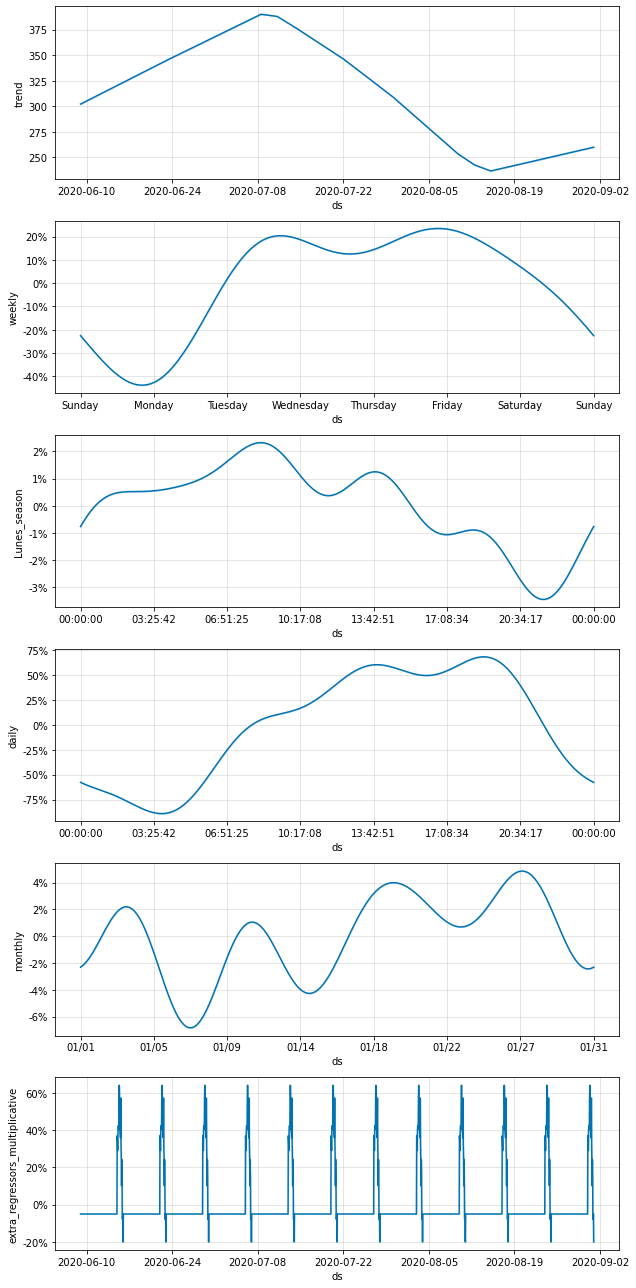

In [21]:
fig, predictions_rolling, history, future = rolling_forecast()

In [22]:
future.tail(24)

,ds,Lunes,Patron1AM_N,Patron2AM_N,Patron3AM_N,Patron4AM_N,Patron5AM_N,Patron6AM_N,Patron7AM_N,Patron8AM_N,...,Patron15PM_N,Patron16PM_N,Patron17PM_N,Patron18PM_N,Patron19PM_N,Patron20PM_N,Patron21PM_N,Patron22PM_N,Patron23PM_N,Patron24AM_N
1992,2020-08-31 00:00:00,True,0.0000,0.000000,0.000000,0.000000,0.0000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,111.091083
1993,2020-08-31 01:00:00,True,85.3215,0.000000,0.000000,0.000000,0.0000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
1994,2020-08-31 02:00:00,True,0.0000,43.552667,0.000000,0.000000,0.0000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
1995,2020-08-31 03:00:00,True,0.0000,0.000000,46.606417,0.000000,0.0000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
1996,2020-08-31 04:00:00,True,0.0000,0.000000,0.000000,48.226083,0.0000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
1997,2020-08-31 05:00:00,True,0.0000,0.000000,0.000000,0.000000,88.7035,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
1998,2020-08-31 06:00:00,True,0.0000,0.000000,0.000000,0.000000,0.0000,170.589,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
1999,2020-08-31 07:00:00,True,0.0000,0.000000,0.000000,0.000000,0.0000,0.000,321.636333,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
2000,2020-08-31 08:00:00,True,0.0000,0.000000,0.000000,0.000000,0.0000,0.000,0.000000,416.714583,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
2001,2020-08-31 09:00:00,True,0.0000,0.000000,0.000000,0.000000,0.0000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000


In [29]:
predictions_rolling = predictions_rolling.set_index('ds')
test_data_N = test_data_N.set_index('ds')

In [30]:
residuals_rolling = test_data_N['y'] - predictions_rolling['yhat']
residuals_rolling = residuals_rolling.to_frame(name='residual_rolling')
residuals_rolling.head()

,residual_rolling
ds,
2020-08-31 00:00:00,-14.933284
2020-08-31 01:00:00,4.602694
2020-08-31 02:00:00,14.747854
2020-08-31 03:00:00,27.280073
2020-08-31 04:00:00,4.961196


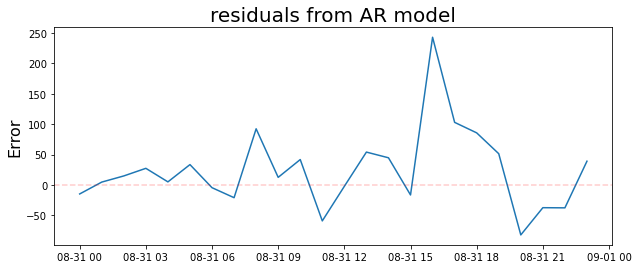

In [31]:
plt.figure(figsize=(10,4))
plt.plot(residuals_rolling)
plt.title('residuals from AR model', fontsize=20)
plt.ylabel('Error',fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'Desplazamientos')

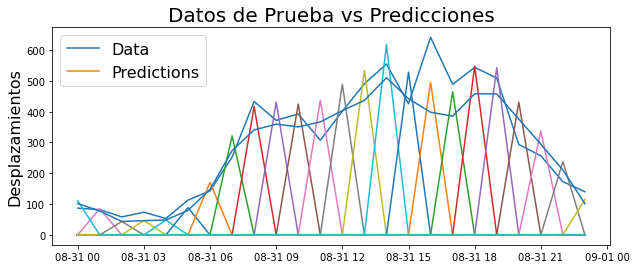

In [32]:
plt.figure(figsize=(10,4))
plt.plot(test_data_N)
plt.plot(predictions_rolling)

plt.legend(('Data','Predictions'),fontsize=16)

plt.title('Datos de Prueba vs Predicciones', fontsize=20)
plt.ylabel('Desplazamientos',fontsize=16)

In [33]:
test_data_N = test_data_N.reset_index()
predictions_rolling = predictions_rolling.reset_index()

In [34]:
fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=test_data_N['ds'], y=test_data_N['y'], name='Actual',))
fig.add_trace(go.Scatter(x=predictions_rolling['ds'], y=predictions_rolling['yhat'], name='Predicted',))
#start_date = "2020-05-11"
#end_date = "2020-05-11 23:00:00"
#fig.update_xaxes(type="date", range=[start_date, end_date])
fig.show()

# Cálculamos MAPE y RMSE
### RMSE se calculan de 2 formas distintas

# MAPE

In [35]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals_rolling['residual_rolling']/test_data_N['y'])),4))

Mean Absolute Percent Error: nan


# RMSE

In [36]:
print('Root Mean Squared Error:',np.sqrt(np.mean(residuals_rolling**2)))
RMSE = sqrt(mean_squared_error(test_data_N.y, predictions_rolling.yhat))
RMSE

Root Mean Squared Error: residual_rolling    68.583134
dtype: float64


/home/jonathan/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



68.58313383049757

In [37]:
fig